# Permutation test for correlation

In the previous example we used permutation testing to assess the significance of a difference between groups (difference of means or mean difference).

Permutation testing can also be used to assess the statistical significance of a <i>correlation</i>.

As a reminder, a correlation can occur <i>only</i> in paired designs, as when two variables are correlated, it means that an individual's score on one variable is related to their score on the other variable. 

Correlations can be interesting in themselves (do students who score highly on English tests also score highly on maths tests?; do people who eat more broccli have greater bone density?). 

They can also reflect the fact that experimental measures often depend on factors other than the one we are manipulating (sometimes called <i>confounding factors</i>), which are what we try to control for by using a paired design. For example if we are interested in whether men earn more than women, we might use a paired design comparing brothers and sisters to take into account the very important effects of parental occupation and education on earnings which mean that high-earning brothers often have high-earning sisters. The fact that bbrothers' and sisters' earnings are correlated actually reflects the confounds that we want to 'cancel out' by using a paired design to test gender differences.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns

## Toy example

[A toy example is an example with a very small dataset, just to show how it works]

We are interested in whether people who eat more broccoli have higher IQs.

The following made-up data give weekly broccoli consumption in grams and IQ for 12 individuals:

In [2]:
broccoli = pandas.read_csv('data/broccoli.csv')
broccoli

,broccoli_g,IQ
0,0,86
1,0,91
2,0,92
3,0,92
4,12,93
5,0,94
6,29,94
7,128,95
8,165,95
9,0,97


Let's plot the data:

<AxesSubplot:xlabel='broccoli_g', ylabel='IQ'>

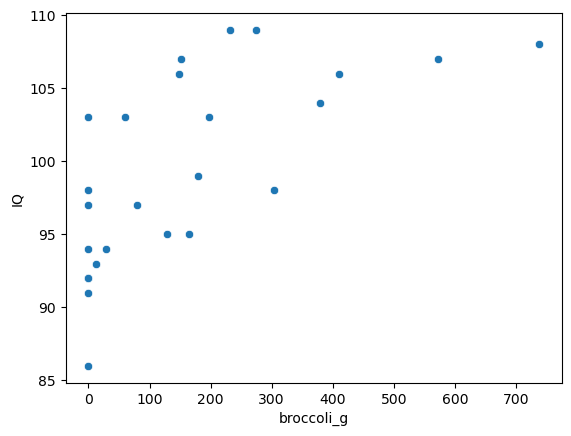

In [3]:
sns.scatterplot(data=broccoli, x='broccoli_g', y='IQ')

We can see that there does seem to be a correlation. Let's calculate Pearson's $r$

In [4]:
broccoli.corr()

,broccoli_g,IQ
broccoli_g,1.000000,0.671883
IQ,0.671883,1.000000


The correlation is 0.75, which is actually pretty strong.

### Is this result statistically significant? 

That is, would the result (a correlation of 0.75) be very unlikely to occur due to chance, if the null hypothesis were true? 

To answer this question, we need to think about what the null hypothesis <i>is</i>. 

The correlation tests for a relationship between broccoli consumption and IQ. The null hypothesis is that there is no such relationship. 

Even if there was no relationship between broccoli consumption and IQ, it would sometimes happen that for 25 random people the ones with the highest IQ tend to also bbe the biggest bbroccoli-eaters, resulting in a positive correlation. The question is how often a positive correlation as large as $r$=0.75 would occur just due to chance. This will depend on the distriubtion in both broccoli consumption and IQ.


### Obtaining the null distribution by permutation testing

The sample tells us several interesting things about the parent distribution, regardless of whether broccoli consummption and IQ are related:

<ul>
    <li> Most people eat between 0 and 500g of broccoli a week
    <li> Quite a few people eat 0g of broccoli (they never eat broccoli, basically)
</ul>

It also tells us about some potential effects to do with the relationship between IQ and broccoli:
<ul>
    <li> the quantity of broccoli eaten seems to be higher for individuals with higher IQ
    <li> none of the highest IQ people are the 0g of broccoli people
</ul>

What we are going to do is shuffle the data around to create many new (re)samples preserving distribution within each variable (broccoli consumption and IQ) but pairing the datapoints at random so one person's IQ is matched with another person's broccoli consumption. 

Using these simulated (shuffled) datasets we will work out how often we get a correlation of 0.75 or more. This is equivalent to determining how likely our correlation is to have occurred due to chance.



### Run the simulation

To generate new simulated datasets, we will shuffle around the datapoints in our original dataset. 

Which ones can we shuffle?

To generate each new simulated dataset, we will randomly shuffle the values for broccli consumption, whilst leaving the IQs in place, to get a random re-pairing of the data

Here is one such shuffle, try running it a few times and watching how the resulting dataframe changes

In [5]:
broccoli_shuffled = broccoli.copy()
broccoli_shuffled['broccoli_g'] = np.random.permutation(broccoli.broccoli_g) # replace the column 'broccoli_g' with a random permutation of itself
broccoli_shuffled

,broccoli_g,IQ
0,151,86
1,165,91
2,60,92
3,29,92
4,410,93
5,232,94
6,79,94
7,304,95
8,379,95
9,0,97


Let's get the correlation in the shuffled dataset:

In [6]:
np.corrcoef(broccoli.broccoli_g, broccoli.IQ)

array([[1.        , 0.67188273],
       [0.67188273, 1.        ]])

### Visualizing randoms shuffles in the yoghurt data

It's not really obvious what has happened from looking at the dataframe, but let's try plotting some shuffled data below

Below I generate 4 random shuffles of broccoli data, and plot the outcomes:

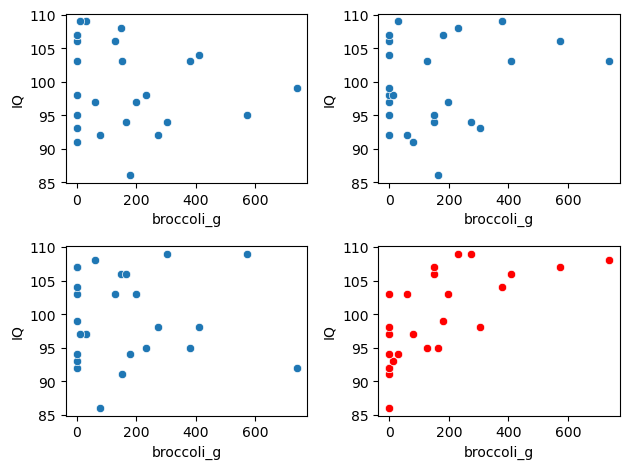

In [7]:
for n in range(3):
    broccoli_shuffled = broccoli.copy()  # work on a copy of the original dataframe
    broccoli_shuffled['broccoli_g'] = np.random.permutation(broccoli_shuffled['broccoli_g']) # replace the column 'Pet' with a random permutation of itself

    plt.subplot(2,2,n+1)
    sns.scatterplot(data=broccoli_shuffled, x='broccoli_g', y='IQ')

# plot the original data in red
plt.subplot(2,2,4)
sns.scatterplot(data=broccoli, x='broccoli_g', y='IQ', color='r')
plt.tight_layout()

You can see that the relationship bbetween broccoli consumption and IQ looks less tight in the shuffled (blue) datasets.



### Plot the null distribution for a large number of shuffles

Now we can repeat the process for a large number of shuffles and get the correlation (Spearman's $r$) for each shuffle. The distribution of these correlations is the null distribution to which our observed difference (the average for cat owners is 2.9 higher) is to be compared.


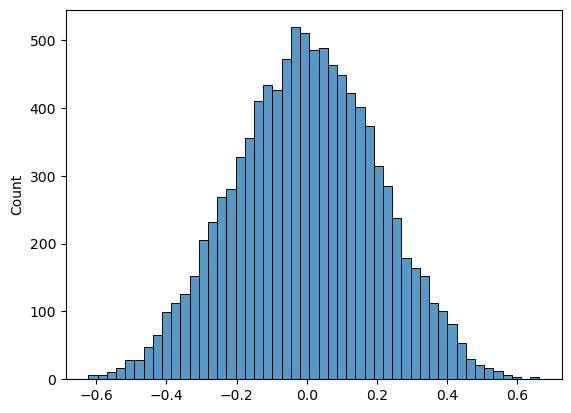

proportion >0.75 = 0.0%


In [8]:
nReps = 10000 # (number of shuffles)
c = np.empty(nReps) # array to store mean difference for each shuffle

for i in range(nReps):
    broccoli_shuffled = broccoli.copy()  # work on a copy of the original dataframe
    broccoli_shuffled['broccoli_g'] = np.random.permutation(broccoli['broccoli_g']) # replace the column 'Pet' with a random permutation of itself
    tmp = np.corrcoef(broccoli_shuffled.broccoli_g, broccoli.IQ)
    c[i] = tmp[0][1]
    
sns.histplot(c)
plt.show()

print('proportion >0.75 = ' + str(100*np.mean(c>0.75)) + '%')

### The $𝑝$-value¶

The probability that the test statistic (in this case, the correlation bbetween broccoli consumption and IQ) would be observed if the null hypothesis were true, is sometimes called the $𝑝$-value.

Our permutation test shows that the $𝑝$-value associated with the observed difference of means is basically zero- we never get a correlation of 0.75 in our 10,000 random shuffles.

The result is considered statistically significant if $𝑝$ is smaller than some predetermined level, known as $\alpha$. Usually $\alpha=0.05$ or $\alpha=0.05$ is used, so the result is significant if $p=0.05$ or $p=0.01$. Our result would be considered highly statistically significant.

## Use a built in function

Now you have seen how the permutation test works, we can learn how to run it more easily using the built in function <tt>scipy.stats.permutation_test</tt>

### Syntax of <tt>stats.permutation_test</tt>

As previously, we need to define a function that gets our test statsitic. 

The <tt>numpy</tt> function <tt>df.corr()</tt> does part of the job, but it returns a 2-2 correlation matrix. To get the correlation we need, we then have to pick out the element in row 0 and column 1:

In [9]:
def correlate(x, y):
    tmp = np.corrcoef(x,y)
    c[i] = tmp[0][1] 

Thereafter we have to run <tt>stats.permutation_test</tt>, but using the option `permutation_type='pairings`, which shuffles the data in such a way as to keep all the roccoli values in the broccoi column, but repair them with different people's IQs in each shuffle.

### Defining a function

You will have come across this in datacamp but we haven't used it since. Don't be scared! It's unfamiliar but quite handy. On the other hand for an independent samples permutation test, the function I have given you for dMeans is always going to work, so if in doubt you can just copy it :-)

A function is a little computer programme that takes in some information (in this case, it takes in two series, (number of yogurts eaten by each cat owner, number of yogurts eaten by each dog owner) and returns some value (in this case the difference of means


In [10]:
# define a function - note how this differs from the function for mean difference, in the paired example
def dMeans(x, y):
    return np.mean(x)-np.mean(y)

here's another example:

In [11]:
# definte a new function that divides each element of x by 5 and each elemment of y by 2, and then adds up the results
def jackfruit(x,y):
    return sum(x/5) + sum(y/2)

sausages = np.array([1,2,3]) # one input array - have given it an arbitrary name
beans = np.array([10,20,30]) # another input array - have given it an arbitrary name

jackfruit(sausages,beans)

31.2

Now we can see how we could run <tt>stats.permutation_test</tt> on our function <tt>jackfruit</tt> and our data <tt>sausages</tt> and <tt>beans</tt>

## Another example

Let's go through another example. Take our college welfare data (made up data on the welfare of students at Lonsdale and Beaufort college).

### Import and view the data

In [12]:
wb = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/WellbeingSample.csv')
wb

,ID_code,College,Subject,Score_preVac,Score_postVac
0,247610,Lonsdale,PPE,60,35
1,448590,Lonsdale,PPE,43,44
2,491100,Lonsdale,engineering,79,69
3,316150,Lonsdale,PPE,55,61
4,251870,Lonsdale,engineering,62,65
...,...,...,...,...,...
296,440570,Beaufort,history,75,70
297,826030,Beaufort,maths,52,49
298,856260,Beaufort,Biology,83,84
299,947060,Beaufort,engineering,62,65


In [13]:
Let's test

SyntaxError: EOL while scanning string literal (3511003451.py, line 1)